# Custom Multi-Layered Perceptron Demo
## Introduction:
This notebook showcases the features of our custom created neural network library. For demonstration purposes, we'll use the MNIST handwritten digit dataset to benchmark our custom model and compare the results with Tensorflow's model. 

**NOTE:** This isn't the final version of our MLP model. I'll make sure to add other features (optimizers, activation funtions, etc) before the final due date.

## Import Necessary Packages:
The following are the modules we'll need to import to run this notebook.

**NOTE:** There is a possibility that if you use the current code on GitHub, the import may crash if you don't have a Nvidia GPU. If that's the case, please remove `import cupy` line for each module and delete all code in the GPU section. Will make sure to fix during our finetuning session.

In [1]:
## Import general modules.
import numpy as np
import time
import matplotlib.pyplot as plt

## Import Tensorflow (CPU compatible only).
import tensorflow as tf

## Import our Custom Neural Networks modules.
## A custom NN model class that contains building, training, and predicting processes.
import Neural_Networks.model as model 

## A custom NN layer class that contains our fully connected layer.
import Neural_Networks.layers as layers

## A custom NN activation class that contains our activation functions.
import Neural_Networks.activations as activations

## A custom NN loss function class that contains our loss functions.
import Neural_Networks.loss as loss

## A custom NN optimizers class that contains all our optimization algorithms.
import Neural_Networks.optimizers as optimizers

## A custom NN metrics class that contains all our evaluation methods.
import Neural_Networks.metrics as metrics

## Get MNIST Dataset:
Fortunately, Tensorflow has the MNIST dataset within their library. Hence, all we need to do is load the MNIST dataset through Tensorflow using the code below.

In [2]:
## Load the MNIST training and testing dataset through Tensorflow.
mnist = tf.keras.datasets.mnist
train_data, test_data = mnist.load_data()

# Divide the data into features and labels.
train_images, train_labels = train_data
test_images, test_labels = test_data

# Reshape and normalize the images.
X_train = train_images.reshape((60000, 784))
X_train = X_train.astype('float32') / 255
X_test = test_images.reshape((10000, 784))
X_test = X_test.astype('float32') / 255

## Hot-encode the training and testing labels so we can apply the loss function.
y_train = tf.keras.utils.to_categorical(train_labels)
y_test = tf.keras.utils.to_categorical(test_labels)

Before building our model, we can print out the shapes of our dataset to see what our inputs and outputs for our model should be.

In [3]:
print(f"The dimensions of our X_train dataset: {X_train.shape} | The dimensiosn of our X_test dataset: {X_test.shape}")
print(f"The dimensions of our y_train dataset: {y_train.shape} | The dimensions of our y_test dataset: {y_test.shape}")

The dimensions of our X_train dataset: (60000, 784) | The dimensiosn of our X_test dataset: (10000, 784)
The dimensions of our y_train dataset: (60000, 10) | The dimensions of our y_test dataset: (10000, 10)


## Building Model: 
### Building Tensorflow Model:
This is a slightly modified version of Tensorflow's MLP model for the MNIST dataset. For more information regarding Tensorflow's model guide, please check this link (https://www.tensorflow.org/guide/core/mlp_core).

We'll use the following architecture:

**Layers:**
 - Input Layer: 784 neurons (the shape of one object from our dataset).
 - Hidden Layer 1: 784 input neurons -> 128 output neurons.
 - Output Layer 2: 128 input neurons -> 10 output neurons.

**Loss Function:**
 - Mean Squared Error (MSE): The original was Cross Entropy Loss Function, but computing its gradient in combination with the Softmax activation function was too difficult. Furthermore, since our NCF model will only have one output neuron (0 for no interaction, 1 for interaction), we won't need to consider Cross Entropy Loss and Softmax.

**Activation Function:**
 - Sigmoid Activation: In the Tensorflow's official guide, they used ReLU. I'll make sure to add more variations of the activation functions. However, for this demo, I'll use sigmoid just to show that the model is learning.

**Optimization Algorithm:**
 - Stochastic Gradient Descent (Mini-batch Gradient Descent): Tensorflow used the Adam optimizer, which is significantly more efficient. I'll make sure to look into this optimization method and hopefully add it to our library in two weeks.

**Metrics:**
 - Accuracy: Standard evaluation function that looks at the ratio of correct predictions with respect to the total observation.

Below shows the model creation on Tensorflow.

In [4]:
## Define the sequential model on Tensorflow.
model_tf = tf.keras.models.Sequential()

## Add the fully-connected layers to the network.
model_tf.add(tf.keras.layers.Dense(128, activation = 'sigmoid', input_shape=(28 * 28,)))
model_tf.add(tf.keras.layers.Dense(10, activation = 'sigmoid'))

## Compile the NN model using designated optimizers, loss, and metrics.
model_tf.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = 0.01), loss='mse', metrics=['accuracy'])

### Building Custom Model:
We'll now create the exact same architecture using our Custom Neural Network library. This is shown below.

In [5]:
## Create our Neural Network model class.
custom_model = model.Model()

## Define our fully-connected layers.
## First hidden layer.
layer1 = layers.Fully_Connected(in_neurons = 784, 
                                out_neurons = 128, 
                                activation = activations.Sigmoid())
## Output layer.
layer2 = layers.Fully_Connected(in_neurons = 128, 
                                out_neurons = 10, 
                                activation = activations.Sigmoid())

## Add our layers to our custom model.
custom_model.add_layers(layer1)
custom_model.add_layers(layer2)

## Training Models:
Now, we can train our models using the MNIST dataset we loaded in. We'll train our model over 100 epochs with a batch size of 256.

**NOTE:** As of right now, both models were trained using CPU.

### Training Tensorflow Model:
The following code trains our Tensorflow model and stores the training process to `history_tf`.

In [6]:
## Define the parameters.
num_epochs = 100
batch_size = 256

## Train Tensorflow model and record time.
start_tf = time.time()
history_tf = model_tf.fit(X_train, 
                          y_train, 
                          epochs = num_epochs, 
                          batch_size = batch_size, 
                          validation_data = (X_test, y_test))
end_tf = time.time()

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0985 - loss: 0.1899 - val_accuracy: 0.1004 - val_loss: 0.1142
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1149 - loss: 0.1080 - val_accuracy: 0.1643 - val_loss: 0.0972
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1783 - loss: 0.0957 - val_accuracy: 0.2087 - val_loss: 0.0927
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2196 - loss: 0.0921 - val_accuracy: 0.2402 - val_loss: 0.0908
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2483 - loss: 0.0905 - val_accuracy: 0.2619 - val_loss: 0.0899
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2687 - loss: 0.0897 - val_accuracy: 0.2813 - val_loss: 0.0894
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2826 - loss: 0.0892 - val_accuracy: 0.2956 - val_loss: 0.0890
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2974 - loss: 0.0889 - val_accu

### Training Custom Model:
We will now train our Custom Neural Networks model. 

**NOTE:** An issue with our training process is that the entire dataset is not covered when training or validating using batch size. For example, if I have 100 elements in my dataset and I use a batch size of 8, only 96 elements will be covered (12 * 8 = 96). Hence, the last remaining 4 elements will not be used for training or validation. I'm currently trying to find a way to implement that last remaining datasets that are less than the batch size in an efficient manner. 

In [7]:
## Train our custom model using the same parameters as our Tensorflow model. Also, record our
## custom training process.
start_custom = time.time()
history_custom = custom_model.train_model(train_ds = X_train, 
                                          val_ds = X_test, 
                                          batch_size = 256, 
                                          train_labels = y_train,
                                          val_labels = y_test, 
                                          optimizer = optimizers.SGD(), 
                                          loss_func = loss.MSE(),
                                          eval_func = metrics.Categorical_Accuracy(), 
                                          lr = 0.01, 
                                          epochs = 100, 
                                          print_epochs = 20
                                        )
end_custom = time.time()

Training Epoch 1: 100%|██████████| 234/234 [00:00<00:00, 455.26it/s]


Training Loss for Epoch 1: 0.16622562094958562 | Training Accuracy for Epoch 1: 0.11685363247863248
Validation Loss for Epoch 1: 0.11789476845590294 | Validation Accuracy for Epoch 1: 0.12419871794871795


Training Epoch 21: 100%|██████████| 234/234 [00:00<00:00, 478.47it/s]


Training Loss for Epoch 21: 0.08687760431720803 | Training Accuracy for Epoch 21: 0.3198951655982906
Validation Loss for Epoch 21: 0.08674436346484865 | Validation Accuracy for Epoch 21: 0.33383413461538464


Training Epoch 41: 100%|██████████| 234/234 [00:00<00:00, 472.75it/s]


Training Loss for Epoch 41: 0.08339607647921549 | Training Accuracy for Epoch 41: 0.4271668002136752
Validation Loss for Epoch 41: 0.08316892912774936 | Validation Accuracy for Epoch 41: 0.44200721153846156


Training Epoch 61: 100%|██████████| 234/234 [00:00<00:00, 476.29it/s]


Training Loss for Epoch 61: 0.07902735432611185 | Training Accuracy for Epoch 61: 0.5012520032051282
Validation Loss for Epoch 61: 0.07870962211614052 | Validation Accuracy for Epoch 61: 0.5128205128205128


Training Epoch 81: 100%|██████████| 234/234 [00:00<00:00, 467.96it/s]


Training Loss for Epoch 81: 0.07422435085621905 | Training Accuracy for Epoch 81: 0.5714810363247863
Validation Loss for Epoch 81: 0.07383728662819661 | Validation Accuracy for Epoch 81: 0.5814302884615384


Training Epoch 100: 100%|██████████| 234/234 [00:00<00:00, 466.06it/s]


## Evaluating Model's Performance:
We can now compare the two models to see how well our custom model performed. 

### Time Difference:
There was a time difference between our two models. However, it didn't take significantly longer than the Tensorflow model.

In [8]:
print(f"Training time for Tensorflow Model: {end_tf - start_tf}")
print(f"Training time for our Custom Model: {end_custom - start_custom}")

Training time for Tensorflow Model: 32.368324756622314
Training time for our Custom Model: 52.38050031661987


### Training and Validation Metrics:
The training process for the Tensorflow model was more efficient and had a better accuracy than our custom model. However, the difference isn't substantial as our custom model was able to be within 5% accuracy of the Tensorflow training. Another reason why our model was less accurate than the Tensorflow model would be because of our batch size error.

In [10]:
## Get train loss, train accuracy, validation loss, and validation accuracy from history_tf.
train_loss_tf = history_tf.history['loss']
train_accs_tf = history_tf.history['accuracy']
val_loss_tf = history_tf.history['val_loss']
val_accs_tf = history_tf.history['accuracy']

## Get train loss, train accuracy, validation loss, and validation accuracy from history_custom.
train_loss = history_custom[0]
train_accs = history_custom[1]
val_loss = history_custom[2]
val_accs = history_custom[3]

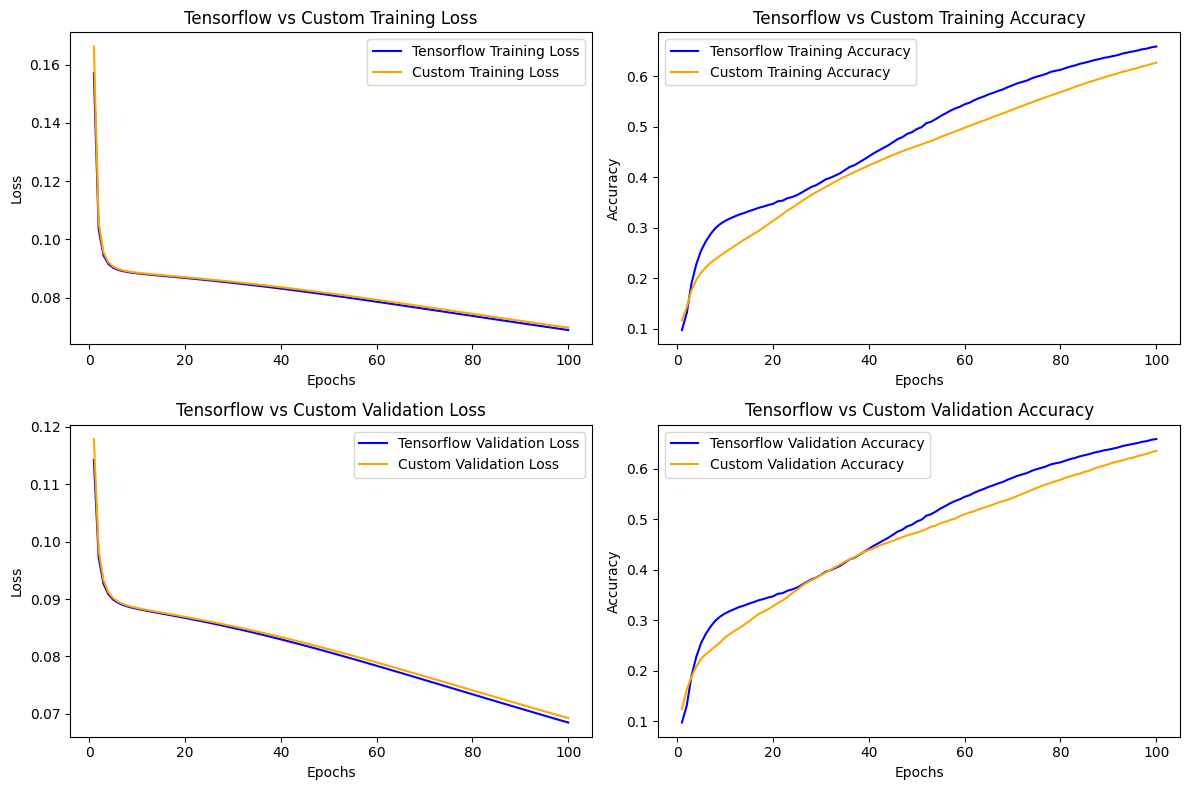

In [11]:
## Create a range for epochs.
epochs = range(1, 101)

## Create a 2x2 grid for subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

## Plot Tensorflow and Custom training losses.
axs[0, 0].plot(epochs, train_loss_tf, label = "Tensorflow Training Loss", color = "blue")
axs[0, 0].plot(epochs, train_loss, label = "Custom Training Loss", color = "orange")
axs[0, 0].set_title("Tensorflow vs Custom Training Loss")
axs[0, 0].set_xlabel("Epochs")
axs[0, 0].set_ylabel("Loss")
axs[0, 0].legend()

## Plot Tensorflow and Custom training accuracies.
axs[0, 1].plot(epochs, train_accs_tf, label = "Tensorflow Training Accuracy", color = "blue")
axs[0, 1].plot(epochs, train_accs, label = "Custom Training Accuracy", color = "orange")
axs[0, 1].set_title("Tensorflow vs Custom Training Accuracy")
axs[0, 1].set_xlabel("Epochs")
axs[0, 1].set_ylabel("Accuracy")
axs[0, 1].legend()

## Plot Tensorflow and Custom validation losses.
axs[1, 0].plot(epochs, val_loss_tf, label = "Tensorflow Validation Loss", color = "blue")
axs[1, 0].plot(epochs, val_loss, label = "Custom Validation Loss", color = "orange")
axs[1, 0].set_title("Tensorflow vs Custom Validation Loss")
axs[1, 0].set_xlabel("Epochs")
axs[1, 0].set_ylabel("Loss")
axs[1, 0].legend()

## Plot Tensorflow and Custom validation accuracies.
axs[1, 1].plot(epochs, val_accs_tf, label = "Tensorflow Validation Accuracy", color = "blue")
axs[1, 1].plot(epochs, val_accs, label = "Custom Validation Accuracy", color = "orange")
axs[1, 1].set_title("Tensorflow vs Custom Validation Accuracy")
axs[1, 1].set_xlabel("Epochs")
axs[1, 1].set_ylabel("Accuracy")
axs[1, 1].legend()

## Show the plots.
plt.tight_layout()
plt.show()

We can see that our custom model most likely has an inferior weight initialization than Tensorflow's. I'll make sure to look more into this if this becomes a bigger issue. However, please note that these are the metrics for this compilation. If we run the training process again, we can get better or worse results for both models.

### Evaluation on Testing Dataset:
We can now evaluate both models' performance on our testing dataset. This is shown below.

In [12]:
## Tensorflow's model predictions.
pred_tf = model_tf.predict(X_test)

## Custom model predictions.
pred_custom = custom_model.predict(X_test)

## Use custom made accuracy metrics to evaluate both models.
acc_func = metrics.Categorical_Accuracy()

## Get Tensorflow's accuracy.
right_tf = acc_func.calculateEqualBatch(y_test, pred_tf)
acc_tf = acc_func.calculateAccuracy(right_tf, y_test.shape[0])

## Get Custom model's accuracy.
right_custom = acc_func.calculateEqualBatch(y_test, pred_custom)
acc_custom = acc_func.calculateAccuracy(right_custom, y_test.shape[0])

## Print out the results of both models.
print(f"Tensorflow model's accuracy on test dataset: {acc_tf}")
print(f"Custom model's accuracy on test dataset: {acc_custom}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
Tensorflow model's accuracy on test dataset: 0.6687
Custom model's accuracy on test dataset: 0.6348


We can see that the Tensorflow's accuracy is better than our accuracy. However, once again, if we implement the full dataset, we'll most likely have an improved accuracy than what we have right now.

## Things To Do:
These are the following things I plan to do for the next 2 - 3 weeks (please let me know if there's anything else you want to add).
 - Create a general collaborative filtering algorithm (start this week (10/29) and finish by this weekend (11/3)).
 - Study and implement Adam optimizer for better performance (start this week (10/29) and finish in a week (11/6)).
 - Start creating NCF model (start after implementing Adam optimizer).